In [2]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set(font='Arial')

In [3]:
sc = StatsCan()


In [8]:
sc.update_tables()

[]

In [25]:
world_mig = sc.table_to_df('17-10-0040-01')
prov_mig = sc.table_to_df('17-10-0020-01')
nat_pop = sc.table_to_df('17-10-0059-01')

In [10]:
prov_mig.rename(columns={"Interprovincial migration":"Components of population growth"},inplace=True)
migrate = world_mig.append(prov_mig)
nat_pop.rename(columns={"Estimates":"Components of population growth"},inplace=True)
migrate = migrate.append(nat_pop)

In [11]:
migrate

,REF_DATE,GEO,DGUID,Components of population growth,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01-01,Canada,2016A000011124,Immigrants,Persons,249,units,0,v29850342,1.1,12738.0,NaN,NaN,NaN,0
1,1946-01-01,Prince Edward Island,2016A000211,Immigrants,Persons,249,units,0,v29850352,3.1,73.0,NaN,NaN,NaN,0
2,1946-01-01,Nova Scotia,2016A000212,Immigrants,Persons,249,units,0,v29850357,4.1,701.0,NaN,NaN,NaN,0
3,1946-01-01,New Brunswick,2016A000213,Immigrants,Persons,249,units,0,v29850362,5.1,520.0,NaN,NaN,NaN,0
4,1946-01-01,Quebec,2016A000224,Immigrants,Persons,249,units,0,v29850367,6.1,2305.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11201,2021-07-01,Yukon,2016A000260,Deaths,Number,223,units,0,v80,12.2,85.0,NaN,NaN,NaN,0
11202,2021-07-01,Northwest Territories,2016A000261,Births,Number,223,units,0,v67,14.1,159.0,NaN,NaN,NaN,0
11203,2021-07-01,Northwest Territories,2016A000261,Deaths,Number,223,units,0,v82,14.2,71.0,NaN,NaN,NaN,0
11204,2021-07-01,Nunavut,2016A000262,Births,Number,223,units,0,v68,15.1,222.0,NaN,NaN,NaN,0


In [12]:
ab_migrate=migrate[migrate['GEO']=='Alberta']

In [13]:
ab_migrate.dropna(subset=['Components of population growth'],inplace=True)



C:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
ab_migrate=ab_migrate[['REF_DATE','Components of population growth','VALUE']]

In [15]:
ab_migrate

,REF_DATE,Components of population growth,VALUE
8,1946-01-01,Immigrants,1044.0
20,1946-04-01,Immigrants,1718.0
32,1946-07-01,Immigrants,2095.0
44,1946-10-01,Immigrants,914.0
56,1947-01-01,Immigrants,569.0
...,...,...,...
11141,2021-01-01,Deaths,7815.0
11168,2021-04-01,Births,12413.0
11169,2021-04-01,Deaths,7126.0
11196,2021-07-01,Births,12499.0


In [16]:
ab_pivot = ab_migrate.pivot(index='REF_DATE',columns='Components of population growth',values='VALUE')

In [17]:
ab_pivot

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants
REF_DATE,,,,,,,,,,
1946-01-01,4791.0,1765.0,NaN,1044.0,NaN,1614.0,NaN,NaN,NaN,NaN
1946-04-01,5752.0,1619.0,NaN,1718.0,NaN,2572.0,NaN,NaN,NaN,NaN
1946-07-01,6012.0,1489.0,NaN,2095.0,NaN,2603.0,NaN,NaN,NaN,NaN
1946-10-01,5629.0,1728.0,NaN,914.0,NaN,2689.0,NaN,NaN,NaN,NaN
1947-01-01,6214.0,1778.0,NaN,569.0,NaN,1461.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-01,12645.0,6903.0,531.0,4896.0,12592.0,NaN,-5065.0,70.0,13454.0,418.0
2020-10-01,11527.0,8473.0,693.0,5318.0,8659.0,NaN,877.0,89.0,10449.0,220.0
2021-01-01,12214.0,7815.0,1251.0,6769.0,15241.0,NaN,1068.0,104.0,18973.0,169.0


In [18]:
ab_pivot['Net interprovincial migration']=ab_pivot['In-migrants']-ab_pivot['Out-migrants']

ab_pivot['Net international migration']=ab_pivot['Immigrants']+ab_pivot['Net non-permanent residents']-ab_pivot['Emigrants']-ab_pivot['Net temporary emigrants']+ab_pivot['Returning emigrants']

ab_pivot['Total net migration']=ab_pivot['Net interprovincial migration']+ab_pivot['Net international migration']

ab_pivot['Net population growth']=ab_pivot['Total net migration']+ ab_pivot['Births']-ab_pivot['Deaths']

In [24]:
ab_pivot

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants,Net interprovincial migration,Net international migration,Total net migration,Net population growth
REF_DATE,,,,,,,,,,,,,,
1946-01-01,4791.0,1765.0,NaN,1044.0,NaN,1614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-04-01,5752.0,1619.0,NaN,1718.0,NaN,2572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-07-01,6012.0,1489.0,NaN,2095.0,NaN,2603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-10-01,5629.0,1728.0,NaN,914.0,NaN,2689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-01-01,6214.0,1778.0,NaN,569.0,NaN,1461.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,12645.0,6903.0,531.0,4896.0,12592.0,NaN,-5065.0,70.0,13454.0,418.0,-862.0,-352.0,-1214.0,4528.0
2020-10-01,11527.0,8473.0,693.0,5318.0,8659.0,NaN,877.0,89.0,10449.0,220.0,-1790.0,5633.0,3843.0,6897.0
2021-01-01,12214.0,7815.0,1251.0,6769.0,15241.0,NaN,1068.0,104.0,18973.0,169.0,-3732.0,6651.0,2919.0,7318.0


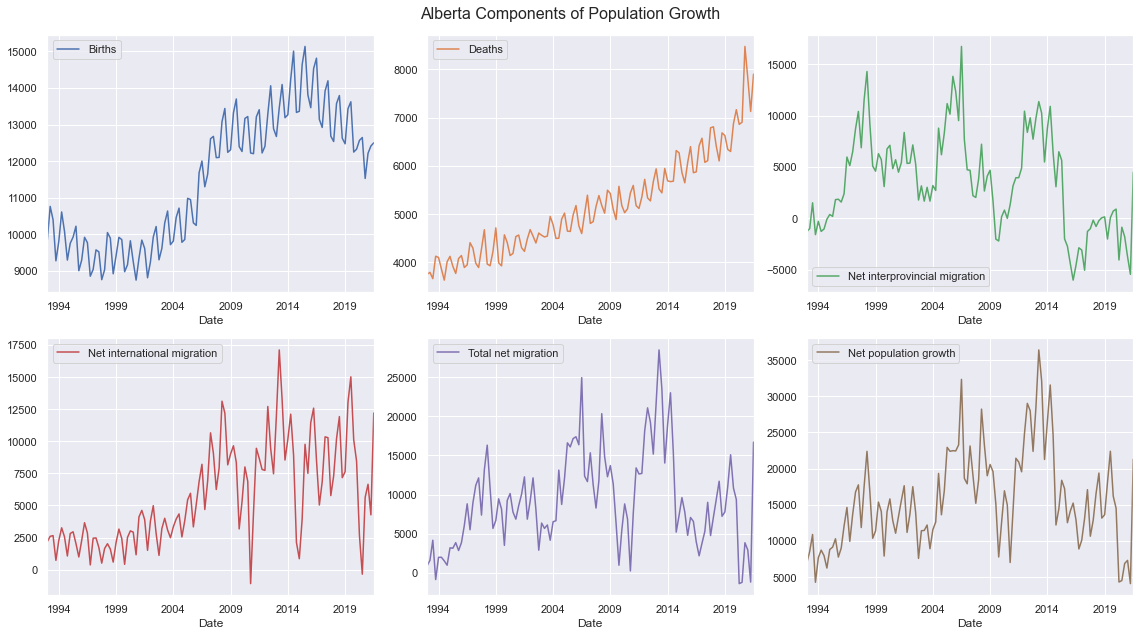

In [20]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
fig.suptitle('Alberta Components of Population Growth', fontsize=16)


ab_pivot[['Births','Deaths','Net interprovincial migration','Net international migration','Total net migration','Net population growth']]['1993':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('migration.png')

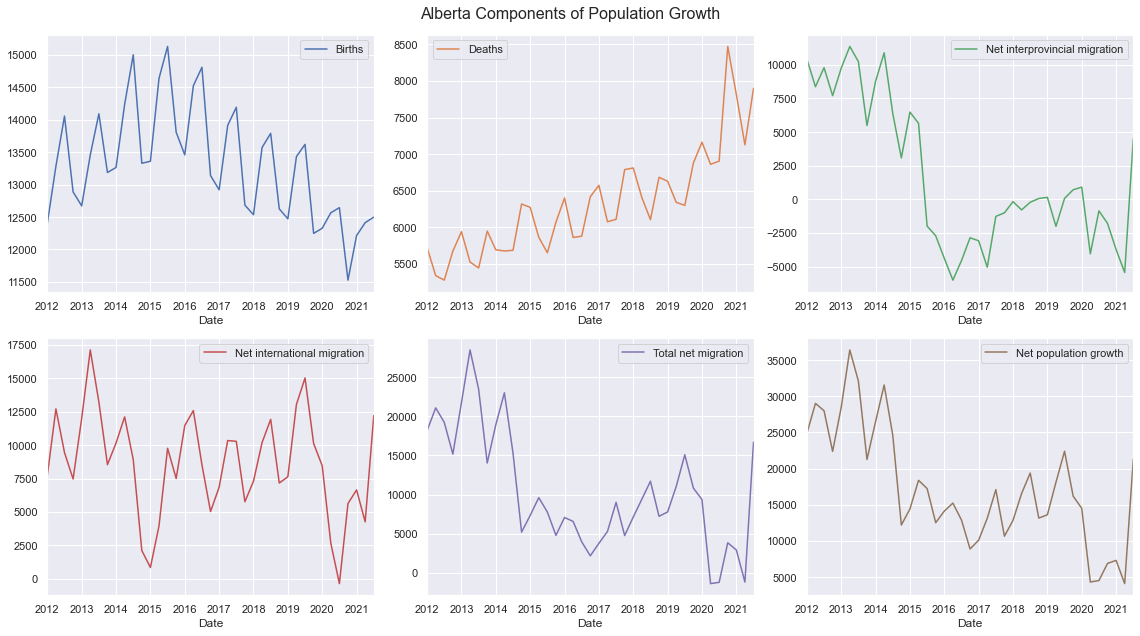

In [21]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
fig.suptitle('Alberta Components of Population Growth', fontsize=16)



ab_pivot[['Births','Deaths','Net interprovincial migration','Net international migration','Total net migration','Net population growth']]['2012':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('pop_growth_short.png')

In [22]:
ab_pivot.diff(4)['2017':]

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants,Net interprovincial migration,Net international migration,Total net migration,Net population growth
REF_DATE,,,,,,,,,,,,,,
2017-01-01,-539.0,173.0,-251.0,-1998.0,-776.0,NaN,-2763.0,10.0,-2080.0,-90.0,1304.0,-4610.0,-3306.0,-4018.0
2017-04-01,-611.0,215.0,-280.0,-3130.0,-515.0,NaN,706.0,4.0,-1473.0,-90.0,958.0,-2238.0,-1280.0,-2106.0
2017-07-01,-617.0,231.0,-373.0,-1634.0,-768.0,NaN,2848.0,-19.0,-4053.0,155.0,3285.0,1761.0,5046.0,4198.0
2017-10-01,-457.0,371.0,-381.0,-353.0,1188.0,NaN,599.0,-6.0,-668.0,100.0,1856.0,733.0,2589.0,1761.0
2018-01-01,-384.0,237.0,-342.0,-2739.0,547.0,NaN,2851.0,22.0,-2363.0,18.0,2910.0,450.0,3360.0,2739.0
2018-04-01,-342.0,332.0,-199.0,-666.0,2314.0,NaN,267.0,30.0,-1947.0,81.0,4261.0,-149.0,4112.0,3438.0
2018-07-01,-403.0,-4.0,-199.0,1958.0,-1090.0,NaN,-544.0,16.0,-2144.0,43.0,1054.0,1640.0,2694.0,2295.0
2018-10-01,-57.0,-105.0,150.0,1374.0,824.0,NaN,207.0,25.0,-240.0,-8.0,1064.0,1398.0,2462.0,2510.0
2019-01-01,-63.0,-181.0,68.0,-2084.0,-1145.0,NaN,2535.0,-3.0,-1464.0,-55.0,319.0,331.0,650.0,768.0


In [23]:
ab_pivot['2017':]

Components of population growth,Births,Deaths,Emigrants,Immigrants,In-migrants,Marriages,Net non-permanent residents,Net temporary emigrants,Out-migrants,Returning emigrants,Net interprovincial migration,Net international migration,Total net migration,Net population growth
REF_DATE,,,,,,,,,,,,,,
2017-01-01,12920.0,6572.0,1753.0,13368.0,14342.0,NaN,-4905.0,534.0,17428.0,676.0,-3086.0,6852.0,3766.0,10114.0
2017-04-01,13915.0,6073.0,1707.0,12297.0,18998.0,NaN,-1074.0,508.0,24050.0,1333.0,-5052.0,10341.0,5289.0,13131.0
2017-07-01,14194.0,6106.0,2403.0,8440.0,15585.0,NaN,2771.0,654.0,16859.0,2127.0,-1274.0,10281.0,9007.0,17095.0
2017-10-01,12683.0,6787.0,1243.0,7997.0,10085.0,NaN,-1228.0,523.0,11091.0,765.0,-1006.0,5768.0,4762.0,10658.0
2018-01-01,12536.0,6809.0,1411.0,10629.0,14889.0,NaN,-2054.0,556.0,15065.0,694.0,-176.0,7302.0,7126.0,12853.0
2018-04-01,13573.0,6405.0,1508.0,11631.0,21312.0,NaN,-807.0,538.0,22103.0,1414.0,-791.0,10192.0,9401.0,16569.0
2018-07-01,13791.0,6102.0,2204.0,10398.0,14495.0,NaN,2227.0,670.0,14715.0,2170.0,-220.0,11921.0,11701.0,19390.0
2018-10-01,12626.0,6682.0,1393.0,9371.0,10909.0,NaN,-1021.0,548.0,10851.0,757.0,58.0,7166.0,7224.0,13168.0
2019-01-01,12473.0,6628.0,1479.0,8545.0,13744.0,NaN,481.0,553.0,13601.0,639.0,143.0,7633.0,7776.0,13621.0


In [26]:
ab_pivot.iloc[:,0]

REF_DATE
1946-01-01     4791.0
1946-04-01     5752.0
1946-07-01     6012.0
1946-10-01     5629.0
1947-01-01     6214.0
               ...   
2020-07-01    12645.0
2020-10-01    11527.0
2021-01-01    12214.0
2021-04-01    12413.0
2021-07-01    12499.0
Name: Births, Length: 303, dtype: float64

In [30]:
cal_mig = sc.table_to_df('17-10-0136-01')

In [32]:
cal_mig=cal_mig[cal_mig['GEO']=='Calgary (CMA), Alberta']

In [34]:
cal_mig=cal_mig[cal_mig['Sex']=='Both sexes']

In [36]:
cal_mig_allage = cal_mig[cal_mig['Age group']=='All ages']

In [37]:
cal_mig_allage=cal_mig_allage[['REF_DATE','Components of population growth','VALUE']]

,REF_DATE,Components of population growth,VALUE
101772,2001/2002,Births,11746.0
101778,2001/2002,Deaths,4744.0
102120,2001/2002,Immigrants,9723.0
102462,2001/2002,Emigrants,2257.0
102804,2001/2002,Returning emigrants,1810.0
...,...,...,...
10220874,2020/2021,Returning emigrants,580.0
10221216,2020/2021,Net temporary emigration,280.0
10221558,2020/2021,Net interprovincial migration,-2953.0
10221900,2020/2021,Net intraprovincial migration,2570.0


In [38]:
cal_all_pivot = cal_mig_allage.pivot(index='REF_DATE',columns='Components of population growth',values='VALUE')

In [44]:
cal_all_pivot['Net international migration']=cal_all_pivot['Immigrants']+cal_all_pivot['Net non-permanent residents']-cal_all_pivot['Emigrants']-cal_all_pivot['Net temporary emigration']+cal_all_pivot['Returning emigrants']

cal_all_pivot['Total net migration']=cal_all_pivot['Net interprovincial migration']+cal_all_pivot['Net international migration']

cal_all_pivot['Net population growth']=cal_all_pivot['Total net migration']+ cal_all_pivot['Births']-cal_all_pivot['Deaths']

In [45]:
cal_all_pivot

Components of population growth,Births,Deaths,Emigrants,Immigrants,Net interprovincial migration,Net intraprovincial migration,Net non-permanent residents,Net temporary emigration,Residual deviation,Returning emigrants,Net international migration,Total net migration,Net population growth
REF_DATE,,,,,,,,,,,,,
2001/2002,11746.0,4744.0,2257.0,9723.0,9014.0,1260.0,972.0,1253.0,2986.0,1810.0,8995.0,18009.0,25011.0
2002/2003,12657.0,4969.0,2827.0,8055.0,4407.0,455.0,929.0,1603.0,2993.0,1458.0,6012.0,10419.0,18107.0
2003/2004,13137.0,5050.0,2958.0,9561.0,3360.0,1069.0,503.0,1446.0,3007.0,1916.0,7576.0,10936.0,19023.0
2004/2005,13460.0,5128.0,2640.0,9387.0,12113.0,1990.0,1121.0,1525.0,3044.0,2256.0,8599.0,20712.0,29044.0
2005/2006,14315.0,5228.0,3110.0,11685.0,13765.0,-169.0,4200.0,1519.0,2571.0,2449.0,13705.0,27470.0,36557.0
2006/2007,15529.0,5434.0,3609.0,11122.0,9738.0,-3488.0,6099.0,1175.0,-945.0,3000.0,15437.0,25175.0,35270.0
2007/2008,16304.0,5469.0,3981.0,12638.0,6255.0,-1484.0,8031.0,1223.0,-895.0,1740.0,17205.0,23460.0,34295.0
2008/2009,16894.0,5598.0,4012.0,13356.0,4668.0,9.0,8022.0,1240.0,-782.0,1907.0,18033.0,22701.0,33997.0
2009/2010,16985.0,5688.0,3649.0,14917.0,-2102.0,669.0,-1300.0,1254.0,-687.0,1930.0,10644.0,8542.0,19839.0


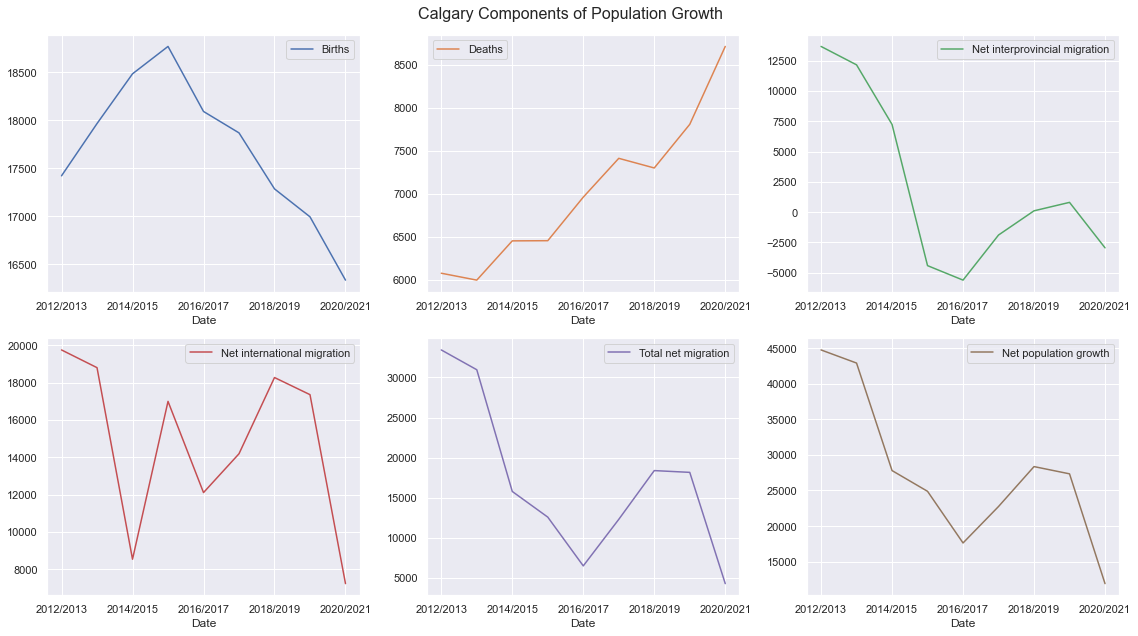

In [46]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
fig.suptitle('Calgary Components of Population Growth', fontsize=16)



cal_all_pivot[['Births','Deaths','Net interprovincial migration','Net international migration','Total net migration','Net population growth']]['2012/2013':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('cal_pop_growth_short.png')

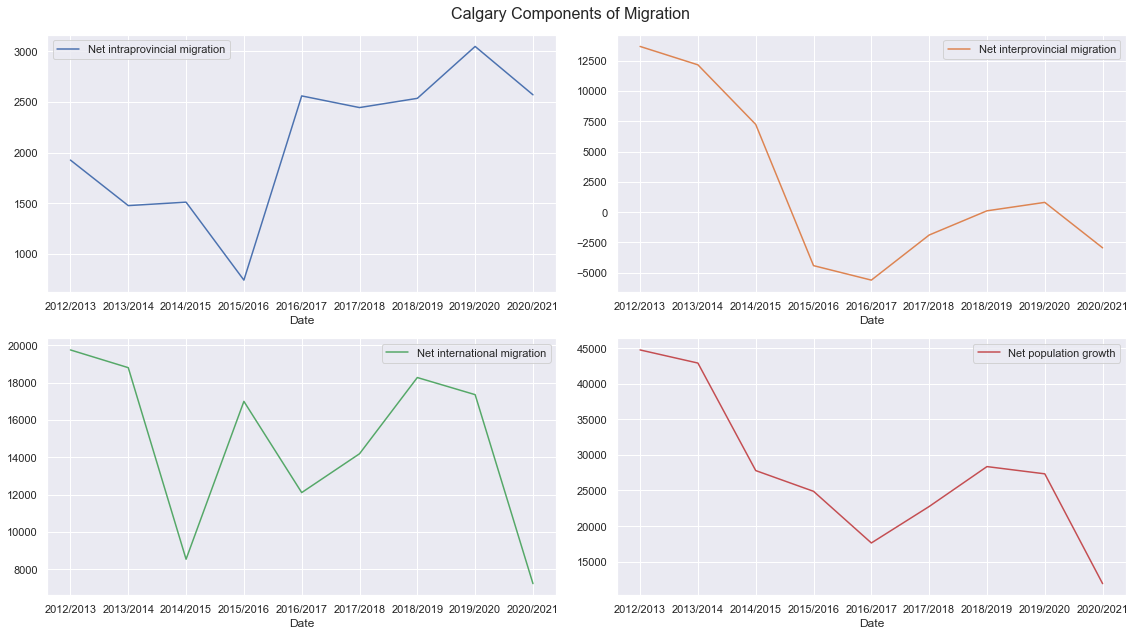

In [48]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,9))
fig.suptitle('Calgary Components of Migration', fontsize=16)



cal_all_pivot[['Net intraprovincial migration','Net interprovincial migration','Net international migration','Net population growth']]['2012/2013':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('cal_mig_short.png')

In [ ]:
cal_mig_allage = cal_mig[cal_mig['Age group']=='All ages']

In [52]:
cal_mig[cal_mig['Age group']=='15 to 44 years']

,REF_DATE,GEO,DGUID,Components of population growth,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS


In [59]:
cal_age_pivot=cal_mig.pivot(index='REF_DATE',columns=['Components of population growth','Age group'],values='VALUE')

In [61]:
cal_age_pivot

Components of population growth   Births            Deaths          \
Age group                       All ages  -1 year All ages -1 year   
REF_DATE                                                             
2001/2002                        11746.0  11746.0   4744.0    63.0   
2002/2003                        12657.0  12657.0   4969.0    67.0   
2003/2004                        13137.0  13137.0   5050.0    48.0   
2004/2005                        13460.0  13460.0   5128.0    71.0   
2005/2006                        14315.0  14315.0   5228.0    80.0   
2006/2007                        15529.0  15529.0   5434.0    64.0   
2007/2008                        16304.0  16304.0   5469.0    79.0   
2008/2009                        16894.0  16894.0   5598.0    75.0   
2009/2010                        16985.0  16985.0   5688.0    72.0   
2010/2011                        16799.0  16799.0   5805.0    66.0   
2011/2012                        16911.0  16911.0   5720.0    59.0   
2012/2013                        17421.0  17421.0   6076.0    73.0   
2013/2014                        17965.0  17965.0   5996.0    77.0   
2014/2015                        18483.0  18483.0   6452.0    77.0   
2015/2016                        18768.0  18768.0   6454.0    63.0   
2016/2017                        18091.0  18091.0   6960.0    71.0   
2017/2018                        17868.0  17868.0   7411.0    65.0   
2018/2019                        17285.0  17285.0   7299.0    63.0   
2019/2020                        16994.0  16994.0   7806.0    66.0   
2020/2021                        16335.0  16335.0   8711.0    68.0   

Components of population growth                                              \
Age group                       0 to 4 years 0 years 1 year 2 years 3 years   
REF_DATE                                                                      
2001/2002                               22.0    11.0    3.0     3.0     3.0   
2002/2003                               23.0    12.0    5.0     2.0     1.0   
2003/2004                               20.0    11.0    2.0     3.0     2.0   
2004/2005                               22.0    10.0    3.0     2.0     3.0   
2005/2006                               17.0     8.0    5.0     2.0     1.0   
2006/2007                               20.0    12.0    3.0     1.0     3.0   
2007/2008                               14.0     6.0    3.0     2.0     1.0   
2008/2009                               13.0     7.0    5.0     0.0     1.0   
2009/2010                               30.0    17.0    4.0     4.0     3.0   
2010/2011                               14.0     6.0    1.0     3.0     3.0   
2011/2012                               18.0     8.0    5.0     3.0     1.0   
2012/2013                               24.0     6.0    8.0     6.0     1.0   
2013/2014                               15.0     7.0    5.0     0.0     2.0   
2014/2015                               16.0     9.0    0.0     4.0     0.0   
2015/2016                               21.0     6.0    7.0     3.0     4.0   
2016/2017                               19.0     7.0    3.0     6.0     2.0   
2017/2018                               16.0     7.0    0.0     4.0     3.0   
2018/2019                               19.0    10.0    4.0     4.0     0.0   
2019/2020                               11.0     5.0    2.0     2.0     2.0   
2020/2021                               10.0     4.0    2.0     2.0     1.0   

Components of population growth          ... Residual deviation           \
Age group                       4 years  ...     85 to 89 years 85 years   
REF_DATE                                 ...                               
2001/2002                           2.0  ...               -7.0     -2.0   
2002/2003                           3.0  ...                5.0      2.0   
2003/2004                           2.0  ...              -11.0     -2.0   
2004/2005                           4.0  ...              -23.0    -13.0   
2005/2006                           1.0

In [63]:
cal_age_pivot['Deaths']

Age group,All ages,-1 year,0 to 4 years,0 years,1 year,2 years,3 years,4 years,5 to 9 years,5 years,...,85 to 89 years,85 years,86 years,87 years,88 years,89 years,90 years and older,0 to 14 years,15 to 64 years,65 years and older
REF_DATE,,,,,,,,,,,,,,,,,,,,,
2001/2002,4744.0,63.0,22.0,11.0,3.0,3.0,3.0,2.0,5.0,2.0,...,637.0,132.0,140.0,123.0,145.0,97.0,525.0,36.0,1265.0,3380.0
2002/2003,4969.0,67.0,23.0,12.0,5.0,2.0,1.0,3.0,10.0,1.0,...,685.0,136.0,155.0,150.0,120.0,124.0,629.0,44.0,1295.0,3563.0
2003/2004,5050.0,48.0,20.0,11.0,2.0,3.0,2.0,2.0,7.0,2.0,...,720.0,149.0,166.0,149.0,124.0,132.0,617.0,33.0,1306.0,3663.0
2004/2005,5128.0,71.0,22.0,10.0,3.0,2.0,3.0,4.0,11.0,3.0,...,710.0,151.0,163.0,139.0,136.0,121.0,605.0,43.0,1373.0,3641.0
2005/2006,5228.0,80.0,17.0,8.0,5.0,2.0,1.0,1.0,8.0,1.0,...,708.0,175.0,126.0,128.0,134.0,145.0,709.0,32.0,1316.0,3800.0
2006/2007,5434.0,64.0,20.0,12.0,3.0,1.0,3.0,1.0,11.0,0.0,...,768.0,179.0,176.0,155.0,131.0,127.0,693.0,42.0,1388.0,3940.0
2007/2008,5469.0,79.0,14.0,6.0,3.0,2.0,1.0,2.0,7.0,1.0,...,826.0,205.0,175.0,177.0,149.0,120.0,757.0,27.0,1415.0,3948.0
2008/2009,5598.0,75.0,13.0,7.0,5.0,0.0,1.0,0.0,7.0,3.0,...,863.0,197.0,191.0,163.0,187.0,125.0,746.0,28.0,1463.0,4032.0
2009/2010,5688.0,72.0,30.0,17.0,4.0,4.0,3.0,2.0,5.0,0.0,...,886.0,166.0,196.0,192.0,165.0,167.0,798.0,43.0,1487.0,4086.0
